In [3]:
from tensorflow import keras
import tensorflow as tf
#import MC_helper
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [6]:
train_data, val_data, train_labels, val_labels = train_test_split(np.load('train_images.npy'), 
                                                                  pd.read_csv('train_labels.csv')["label"], 
                                                                  train_size=0.8,
                                                                  random_state=5)

train_labels = train_labels.reset_index(drop=True)
val_labels = val_labels.reset_index(drop=True)

#EDA: Dataset Analysis

In [ ]:
print("Shape Train Data: ", train_data.shape)
print("Largo label array: ", len(train_labels))
print("Contenido train label:", train_labels)

sparse_image= train_data[0].flatten()
print("Dentro de data_train Max_value={max} y Min_value={min}".format(max=max(sparse_image), min=min(sparse_image)))

Shape Train Data:  (48000, 28, 28)
Largo label array:  48000
Contenido train label: 0        3
1        0
2        2
3        3
4        1
        ..
47995    7
47996    0
47997    1
47998    3
47999    9
Name: label, Length: 48000, dtype: int64
Dentro de data_train Max_value=255 y Min_value=0


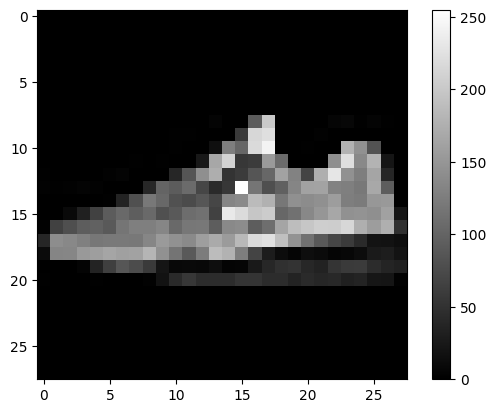

In [ ]:
plt.imshow(train_data[50], cmap="gray")
plt.colorbar()
plt.show()

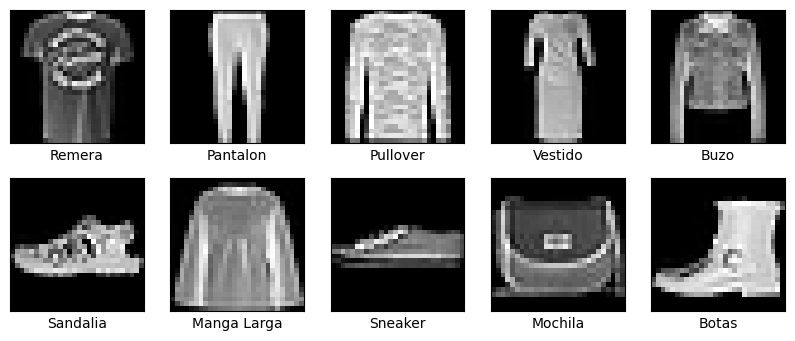

In [10]:
clothes=["Remera", "Pantalon", "Pullover", "Vestido", "Buzo", 
         "Sandalia", "Manga Larga", "Sneaker", "Mochila", "Botas"]

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[train_labels==i][0], cmap="gray")
    plt.xlabel(clothes[i])
plt.show()

## Composicion datos entrenamiento


Text(0.5, 1.0, 'Train Composition')

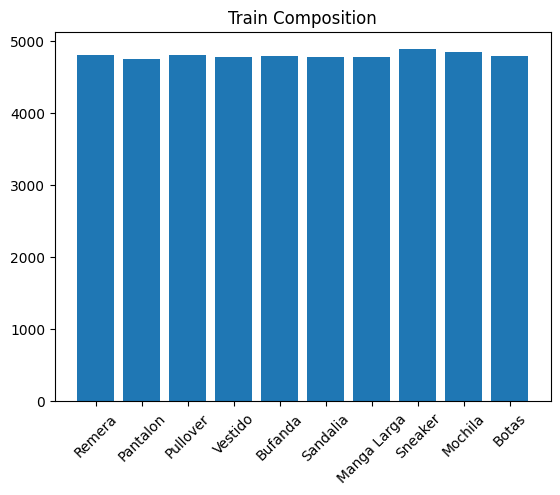

In [ ]:
clothes=["Remera", "Pantalon", "Pullover", "Vestido", "Bufanda", 
         "Sandalia", "Manga Larga", "Sneaker", "Mochila", "Botas"]

count=[np.count_nonzero(train_labels==value) for value in range(10)]
plt.bar(range(10), count)
plt.xticks(range(10), clothes, rotation=45)
plt.title('Train Composition')

Podemos ver del gráfico que la composición del training set es medianamente uniforme para todas las categorias.

## PCA

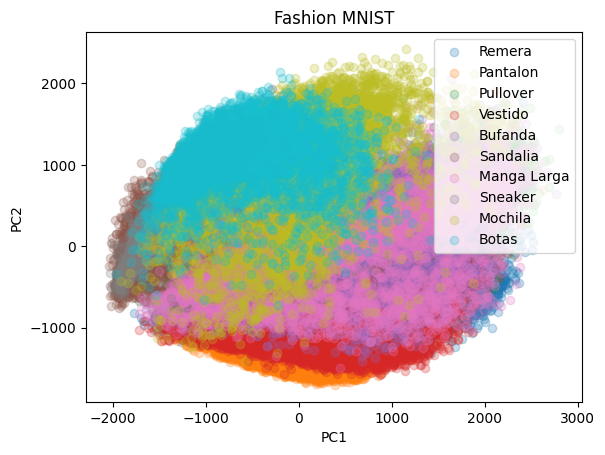

In [ ]:
from sklearn.decomposition import PCA

clothes=["Remera", "Pantalon", "Pullover", "Vestido", "Bufanda", 
         "Sandalia", "Manga Larga", "Sneaker", "Mochila", "Botas"]

data_flatten=[]
for i in range(len(train_data)):
  data_flatten.append(train_data[i].flatten())


pca = PCA(n_components = 2)

X_train = pca.fit_transform(data_flatten)

for i, j in enumerate(np.unique(train_labels)):
    plt.scatter(X_train[train_labels == j, 0], X_train[train_labels == j, 1],
                color = "C"+str(i), label = clothes[j], alpha=0.25)
 
plt.title('Fashion MNIST')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Se puede ver en el gráfico anterior que los datos no es encuentran claramente separados si realizamos una descomposición PCA. Esto puede deberse a que los datos están difusos o que PCA no es la descoposición correcta para analizarlos. 

#Data Augmentation

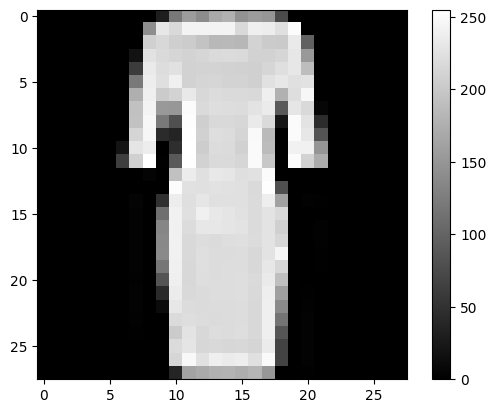

In [ ]:
np.append(train_data, np.flip(train_data, axis=2))
np.append(train_labels, train_labels)

plt.imshow(train_data[len(train_data)-50], cmap="gray")
plt.colorbar()
plt.show()

# Preprocesamiento

In [ ]:
# Normalizamos
train_data= train_data/max(train_data.flatten())
val_data= val_data/max(val_data.flatten())

In [ ]:
#One Hot encoding
train_sparse_labels = keras.utils.to_categorical(train_labels)
val_sparse_labels = keras.utils.to_categorical(val_labels)

#Regresión SoftMax

In [ ]:
softMaxModel=keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(10, activation='softmax')
])

softMaxModel.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'AUC', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
softMaxModel.fit(train_data, train_sparse_labels, epochs=30)

Epoch 1/30
1500/1500 [==============================] - 10s 3ms/step - loss: 0.6279 - accuracy: 0.7880 - auc: 0.9787 - precision: 0.8736 - recall: 0.6815
Epoch 2/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4710 - accuracy: 0.8408 - auc: 0.9864 - precision: 0.8839 - recall: 0.7916
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4412 - accuracy: 0.8484 - auc: 0.9877 - precision: 0.8867 - recall: 0.8075
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4263 - accuracy: 0.8537 - auc: 0.9884 - precision: 0.8885 - recall: 0.8165
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4164 - accuracy: 0.8574 - auc: 0.9889 - precision: 0.8895 - recall: 0.8231
Epoch 6/30
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4082 - accuracy: 0.8583 - auc: 0.9892 - precision: 0.8902 - recall: 0.8261
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.403

## Metricas de interés


In [ ]:
softMax_val_loss, softMax_val_acc, softMax_val_AUC, softMax_val_Pres, softMax_val_Rec = softMaxModel.evaluate(val_data, val_sparse_labels)

SoftMAx_F1 = sklearn.metrics.f1_score(val_labels, np.argmax(softMaxModel.predict(val_data), axis=1), average='macro')

print("Validation accuracy: {0:.3f}".format(softMax_val_acc))
print("AUC in  Validation: {0:.3f}".format(softMax_val_AUC))
print("Precision in Validation: {0:.3f}".format(softMax_val_Pres))
print("Recall in Validation: {0:.3f}".format(softMax_val_Rec))
print("Macro F1 Score in Validation: {0:.3f}".format(SoftMAx_F1))


375/375 [==============================] - 1s 2ms/step
Validation accuracy: 0.851
AUC in  Validation: 0.987
Precision in Validation: 0.878
Recall in Validation: 0.823
Macro F1 Score in Validation: 0.852


Se eligió **F1-Score Macro** ya que el contexto presenta varias categorías todas de igual importancia (por eso no utilizamos Weighted F1-Score). A su vez, nos interesa que la métrica distinga los TP, FP, FN entre categorías calculando los F1-Score de cada catergoría por separado (por ello no utilizamos F1-Score Micro). 


Debido al **desempeño superior que tenía la red MLP** (vease en el sgte. apartado) este modelo no fue tenido en cuenta para el análisis en la variación de los distintos hiperparámetros.

#Modelo MLP

##Modelo Base


In [ ]:
model=buildModel()

my_metrics=['accuracy', 'AUC', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', metrics=my_metrics)
  
model.fit(x=train_data, y=train_sparse_labels, batch_size=32, epochs=15, 
          validation_data=(val_data, val_sparse_labels))

Epoch 1/20
1500/1500 [==============================] - 19s 12ms/step - loss: 0.6273 - accuracy: 0.7696 - auc: 0.9767 - precision: 0.8441 - recall: 0.6936 - val_loss: 0.4597 - val_accuracy: 0.8325 - val_auc: 0.9866 - val_precision: 0.8609 - val_recall: 0.8025
Epoch 2/20
1500/1500 [==============================] - 16s 10ms/step - loss: 0.4687 - accuracy: 0.8302 - auc: 0.9859 - precision: 0.8735 - recall: 0.7853 - val_loss: 0.3985 - val_accuracy: 0.8552 - val_auc: 0.9903 - val_precision: 0.9013 - val_recall: 0.8004
Epoch 3/20
1500/1500 [==============================] - 16s 11ms/step - loss: 0.4340 - accuracy: 0.8413 - auc: 0.9878 - precision: 0.8820 - recall: 0.8027 - val_loss: 0.3845 - val_accuracy: 0.8582 - val_auc: 0.9904 - val_precision: 0.8937 - val_recall: 0.8267
Epoch 4/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4142 - accuracy: 0.8502 - auc: 0.9888 - precision: 0.8851 - recall: 0.8166 - val_loss: 0.3573 - val_accuracy: 0.8716 - val_auc: 0.9917 - val

### Metricas de interes

In [ ]:
val_loss, val_acc, val_AUC, val_Pres, val_Rec= model.evaluate(val_data, val_sparse_labels)

valF1Score = sklearn.metrics.f1_score(val_labels, np.argmax(model.predict(val_data), axis=1), average='macro')

print("Validation accuracy: {0:.3f}".format(val_acc))
print("AUC in  Validation: {0:.3f}".format(val_AUC))
print("Precision in Validation: {0:.3f}".format(val_Pres))
print("Recall in Validation: {0:.3f}".format(val_Rec))
print("Macro F1 Score in Validation: {0:.3f}".format(valF1Score))

375/375 [==============================] - 1s 3ms/step
Validation accuracy: 0.891
AUC in  Validation: 0.993
Precision in Validation: 0.906
Recall in Validation: 0.875
Macro F1 Score in Validation: 0.891


## Matriz de confusion

375/375 [==============================] - 1s 4ms/step
Normalized confusion matrix


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

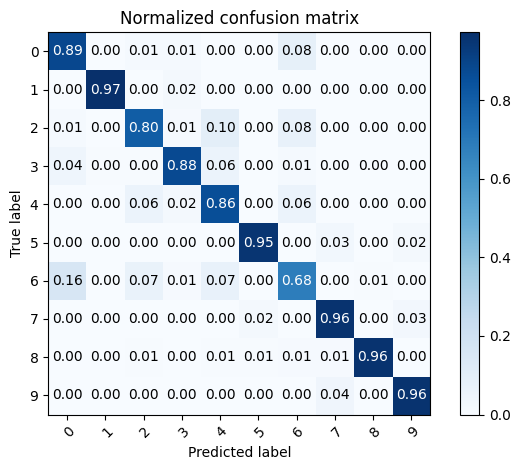

In [ ]:
plot_confusion_matrix(val_labels,np.argmax(model.predict(val_data), axis=1), [i for i in range(10)], normalize=True)

## Grafico de Barras de errores en Validation

375/375 [==============================] - 1s 3ms/step


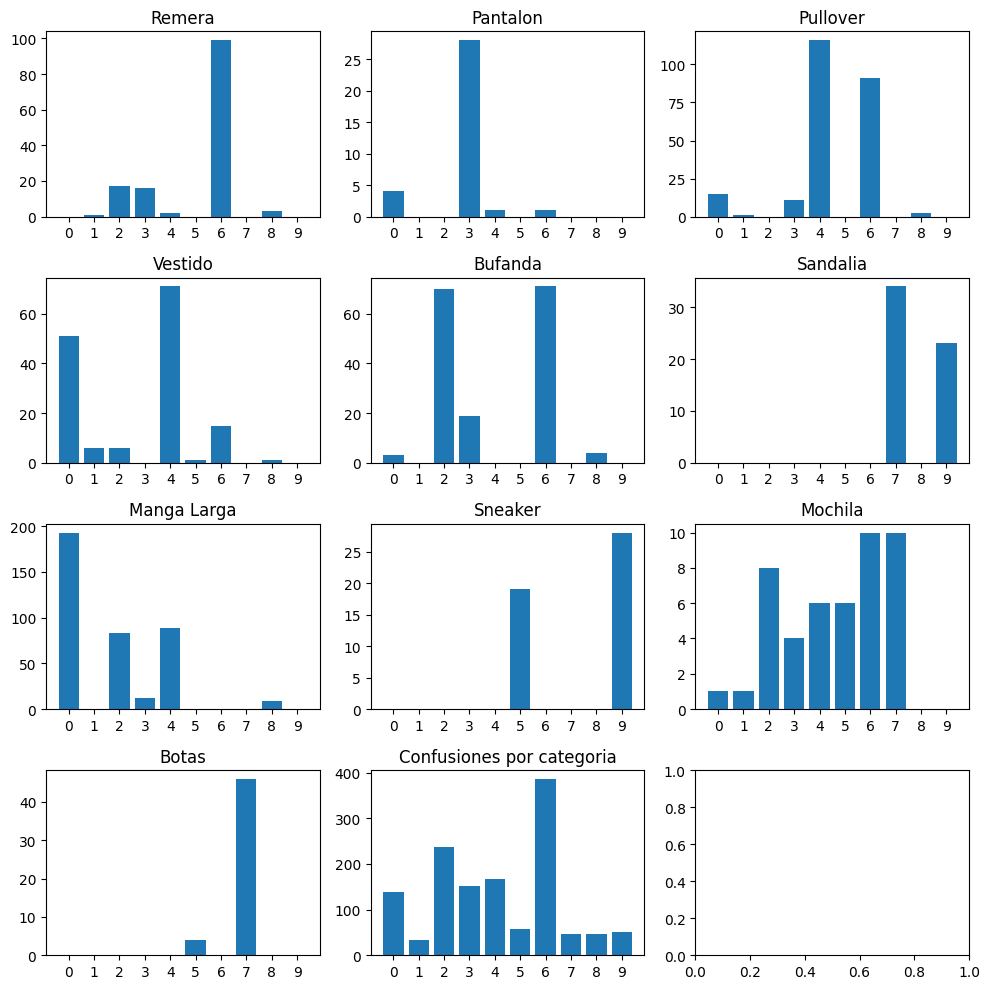

In [ ]:
clothes=["Remera", "Pantalon", "Pullover", "Vestido", "Bufanda", 
         "Sandalia", "Manga Larga", "Sneaker", "Mochila", "Botas"]
         
predict=np.argmax(model.predict(val_data), axis=1)
aux = np.array(val_labels)

# Recuento de confusiones por prenda 
errors=np.zeros((10,10))

for i in range(len(aux)):
  if predict[i] != aux[i]:
    errors[aux[i]][predict[i]]+=1

# Recuento de errores
error_count=[errors[value].sum() for value in range(10)]

#Grafico de Errores
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

for prenda in range(10):
  axes[prenda//3, prenda%3].bar(range(10), errors[prenda])
  axes[prenda//3, prenda%3].set_title(clothes[prenda])
  axes[prenda//3, prenda%3].set_xticks(range(10))

axes[3,1].bar(range(10), error_count)
axes[3,1].set_title('Confusiones por categoria')
axes[3,1].set_xticks(range(10))

plt.tight_layout()
plt.show()

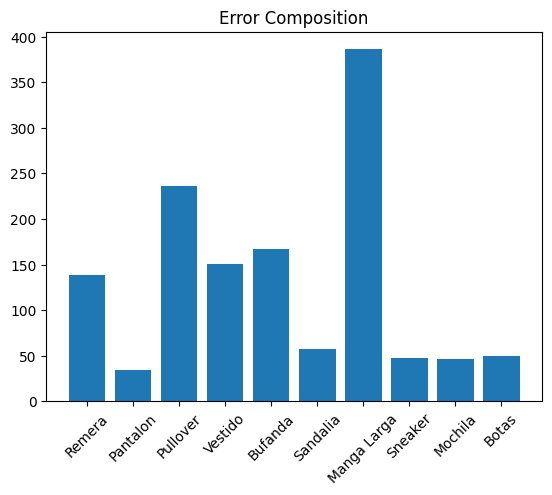

In [ ]:
plt.bar(range(10), error_count)
plt.xticks(range(10), clothes, rotation=45)
plt.title('Error Composition')
plt.show()

De este último gráfico podemos ver que son las remeras manga larga las prendas más dificil de clasificar. Es por ello que si deseamos mejorar el desempeño de la red, lo más eficiente sería tomar alguna acción que tenga consecuencias sobre dicha categoría como puede ser hacer data augmentation.

# Ajuste de Hyperparámetros

##Learning Rate

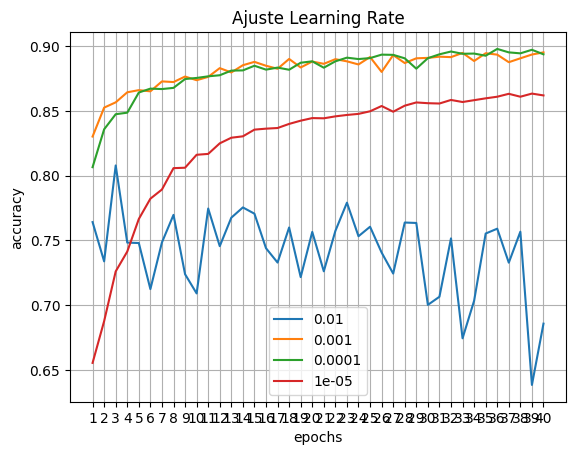

In [ ]:
values=[1e-2, 1e-3, 1e-4, 1e-5]
CANT_EPOCHS=40

for value in values:
  model = buildModel()
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=value),
              loss='categorical_crossentropy',
              metrics="accuracy")
  
  history=model.fit(x=train_data, y=train_sparse_labels, batch_size=32, 
                    epochs=CANT_EPOCHS, verbose=0, 
                    validation_data=(val_data, val_sparse_labels))
  
  plt.plot(np.arange(1,CANT_EPOCHS+1), history.history["val_accuracy"], label=value)


showGraph(title="Ajuste Learning Rate", epochs=CANT_EPOCHS)

Valores de Learning Rate muy bajo ($LR= 10^{-5}$) demoran demasiado en converger a un buen valor.

Valores de Learning Rate muy alto ($LR= 10^{-2}$) convergen a un valor de accuracy considerablemente malo independientemente de las cantidad de epochs.

Valores de Learning Rate medios ($10^{-4} \leq LR \leq 10^{-3}$) convergen a buenos valores de accuracy en cantidad de epochs medias. Particularmente podemos ver como $LR=10^{-3}$ converge levemente más rápido mientras que $LR=10^{-4}$ lo hace a un valor levemente mejor.

De estos gráficos puede notarse que puede ser muy beneficioso la utilización de Learning Rate Schedulers (como OnPlateu) que varíen el LR a medida que se desarrolle el entrenamiento. 

##Batch Size

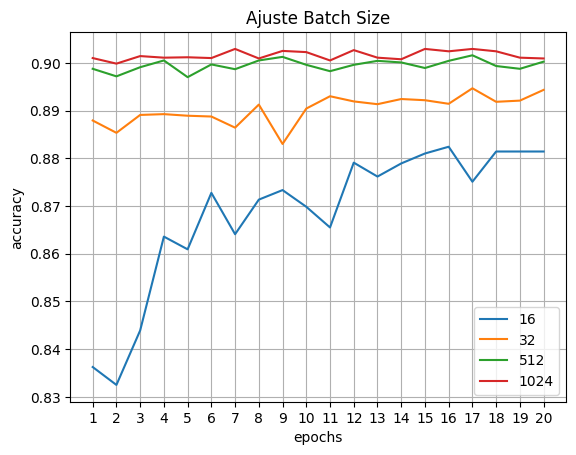

In [ ]:
sizes=[16, 32, 512, 1024]
CANT_EPOCHS=20

model = buildModel()

for size in sizes:
  model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics="accuracy")
  
  history=model.fit(x=train_data, y=train_sparse_labels, batch_size=size, epochs=CANT_EPOCHS, 
            validation_data=(val_data, val_sparse_labels), verbose=0)
  
  plt.plot(np.arange(1,CANT_EPOCHS+1), history.history["val_accuracy"], label=size)

showGraph(title="Ajuste Batch Size", epochs=CANT_EPOCHS)

En grandes datasets podemos utilizar grandes batchs size para **acelerar el entrenamiento** (vease en el gráfico que a mayor batch size más rápido converge el entrenamiento) sin por ello disminuir el accuracy en validación.

Si el dataset no es lo suficientemente grande, utilizar batch size grande puede no resultar tan beneficioso ya que en dicha circunstancia sí tendríamos que ejecutar durante más epochs o disminuir nuestro accuracy.

## Optimizadores

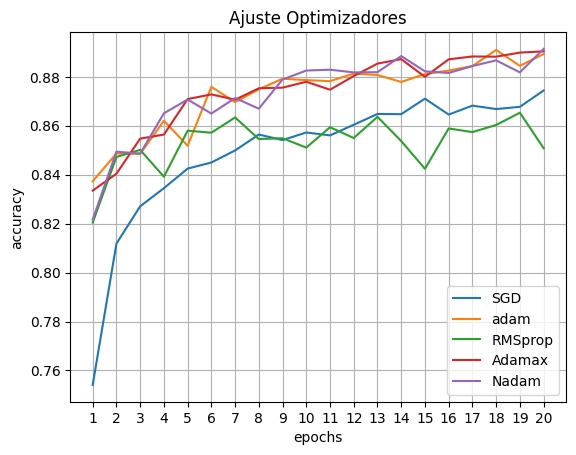

In [ ]:
optimizers=["SGD", 'adam', 'RMSprop', 'Adamax', 'Nadam']
CANT_EPOCHS=20

for optimizer in optimizers:
  model = buildModel()
  model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics="accuracy")
  
  history=model.fit(x=train_data, y=train_sparse_labels, batch_size=32, epochs=CANT_EPOCHS, 
            validation_data=(val_data, val_sparse_labels), verbose=0)
  
  plt.plot(np.arange(1,CANT_EPOCHS+1), history.history["val_accuracy"], label=optimizer)

showGraph(title="Ajuste Optimizadores", epochs=CANT_EPOCHS)

En este dataset, **todos los optimizadores se comportaron de forma similar** a excepcion de SGD que demoró más en converger a un buen valor de accuracy.

Por su parte, RMSProp convergió a un valor de accuracy levemente inferior al resto.

## Activation

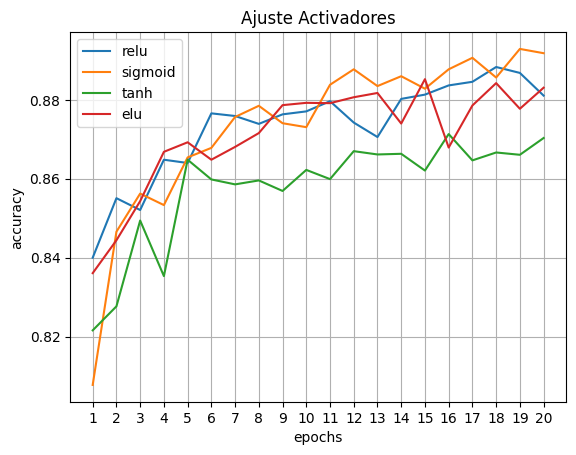

In [ ]:
activators=['relu', 'sigmoid', 'tanh', 'elu']
CANT_EPOCHS=20

for activator in activators:

  model = buildModel(activation=activator)

  model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics="accuracy")
  
  history=model.fit(x=train_data, y=train_sparse_labels, batch_size=32, epochs=CANT_EPOCHS, 
            validation_data=(val_data, val_sparse_labels), verbose=0)
  
  plt.plot(np.arange(1,CANT_EPOCHS+1), history.history["val_accuracy"], label=activator)

showGraph(title="Ajuste Activadores", epochs=CANT_EPOCHS)

Todos las funciones de activacion mostraron **desempeño similar**. Tanh demoró un poco más de converger y, cuando lo hizo, convergió a un valor un tanto menor que las restantes.

En esta arquitectura la función sigmoid fue la que mejor se comportó, aunque elu y relu no se quedaron atrás ni en velocidad de convergencia ni en valor de convergencia. Es posible que si aumentamos la cantidad de capas o la cantidad de neuronas por capa sea mejor cualquiera de estas tres funciones de activacion.

##DropOut

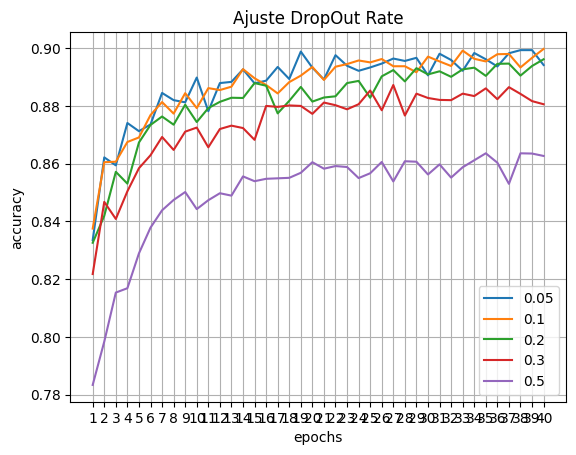

In [ ]:
rates=[0.05, 0.1, 0.2, 0.3, 0.5]
CANT_EPOCHS=40

for rate in rates:

  model = buildModel(dropout=rate)

  model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics="accuracy")
  
  history=model.fit(x=train_data, y=train_sparse_labels, batch_size=32, epochs=CANT_EPOCHS, 
            validation_data=(val_data, val_sparse_labels), verbose=0)
  
  plt.plot(np.arange(1,CANT_EPOCHS+1), history.history["val_accuracy"], label=rate)

showGraph(title="Ajuste DropOut Rate", epochs=CANT_EPOCHS)

Podemos ver a que a mayor DropOut rate más se demora en converger el entrenamiento y no necesariamente mejora el valor al que se converge.

Los **mejores valores** de DropOut rate se encuentran **entre 0.05 y 0.2**. Entre ellos el valor al que convergen es el mismo pero el valor 0.2 demora levemente más en lograrlo.

## Batch Normalization

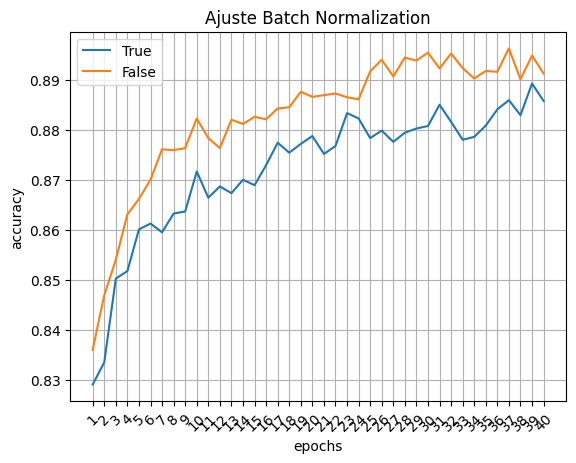

In [ ]:
values=[True, False]
CANT_EPOCHS=40

for value in values:
  model = buildModel(batchNormalization=value)
  model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics="accuracy")
  
  history=model.fit(x=train_data, y=train_sparse_labels, batch_size=32, epochs=CANT_EPOCHS, 
            validation_data=(val_data, val_sparse_labels), verbose=0)
  
  plt.plot(np.arange(1,CANT_EPOCHS+1), history.history["val_accuracy"], label=value)

showGraph(title="Ajuste Batch Normalization", epochs=CANT_EPOCHS)

En ambos casos (tanto con como sin Batch Normalization) la velocidad de convergencia es la misma, unicamente la diferencia es que en este caso sin batch Normalization converge a un valor muy poco menor. 

En redes de mayor cantidad de capas y mayor cantidad de neuronas por capa puede resultar más beneficioso colocar capas de normalización entre algunas de dichas capas.

Por otro lado, suele no ser recomendado utilizar DropOut y BatchNormalization en la misma capa, ya que trae efectos perjudiciales comparado tanto con el uso de cada uno por separado y como el uso de ninguno. Lamentablemente, por el método que se eligió para el tunneo de hyperparámetros la red debía tener ambos. 

## Inicializacion de pesos


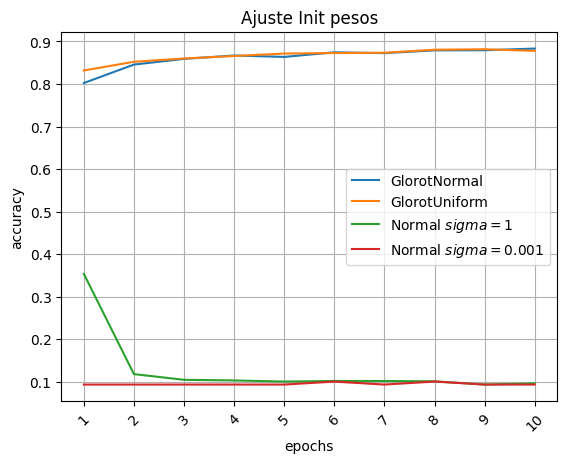

In [ ]:
inits=[tf.keras.initializers.GlorotNormal(), 
       tf.keras.initializers.GlorotUniform(), 
       tf.keras.initializers.RandomNormal(mean=0., stddev=1.), 
       tf.keras.initializers.RandomNormal(mean=0., stddev=0.001)
       ]

CANT_EPOCHS=10

inits_names=["GlorotNormal", "GlorotUniform", "Normal $sigma=1$", "Normal $sigma=0.001$"]

for i in range(len(inits)):

  model = buildModel(init=inits[i])

  model.compile(optimizer="adam",
              loss='categorical_crossentropy',
              metrics="accuracy")
  
  history=model.fit(x=train_data, y=train_sparse_labels, batch_size=32, epochs=CANT_EPOCHS, 
            validation_data=(val_data, val_sparse_labels), verbose=0)
  
  plt.plot(np.arange(1,CANT_EPOCHS+1), history.history["val_accuracy"], 
           label=inits_names[i])

showGraph(title="Ajuste Init pesos", epochs=CANT_EPOCHS)

Tanto el inicializador Glorot normal como el Glorot uniforme convergieron a valores similares a una velocidad similar también resultando en buenas opciones. 

Por otro lado, los inicializadores normales no dieron buenos resultados finalizando en una pobre accuracy de validación de 0.1. Esto se debe a que la función de activación RELU tiene derivada nula para valores negativos y todos los valores de la red que inicialicen con valores menores a 0 no serán modificados. En caso de utilizarse funciones de inicializacion normales con media 0 puede ser conveniente utilizar funciones de activación que tengan derivada no nula en el semiplano negativo como la función de activación sigmoidea o LeakyRelu. 

En conclusión, los Inicializadores **Glorot presentaron un muy buen** desempeño mientras que los inicializadores con distribución **normal de media cero no resultaron buenos** para este modelo.

# Decision Boundary

In [ ]:
boundaryModel = DB_model()

boundaryModel.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', metrics="accuracy")
  
DBhistory=boundaryModel.fit(x=train_data, y=train_sparse_labels, batch_size=32, epochs=30, 
          validation_data=(val_data, val_sparse_labels), verbose=0)

print("Val Accuracy:", DBhistory.history["val_accuracy"][-1])

Val Accuracy: 0.8598333597183228


31250/31250 [==============================] - 40s 1ms/step


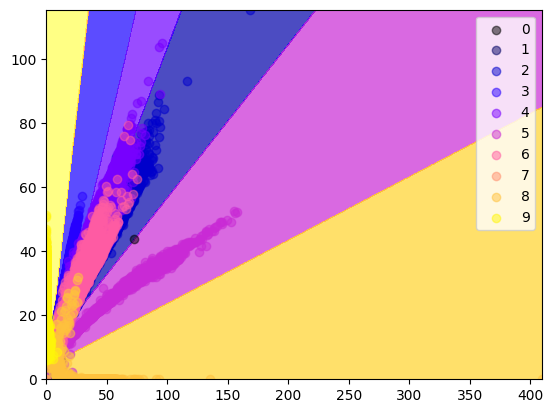

In [ ]:
plt_decision_boundary(model=boundaryModel, features=train_data, labels=train_labels)

Se puede notar ciertos errores en los límites de decision debido a que la red no es perfecta y su $accuracy \neq 1$. Sin embargo es evidente que la mayoría de los datos de entrenamiento de cada clase se encuentran dentro de los limites de decisión de cada clase. 

Resulta importante destacar el caso de la clase 6, que ya en el modelo original había denotado ser una clase dificil de clasificar y ser una de la que mayores errores generaba en la red. En este gráfico podemos ver que los elementos de dicha clase se encuentran "mezclados" difusamente entre elementos de otras clases.  

#Pruning

Basado en: https://www.tensorflow.org/model_optimization/guide/pruning/comprehensive_guide

In [ ]:
base_model=buildModel()

# Guardamos red1
base_model.save_weights("red1.h5")

# Entrenamos red1 y la guardamos como red 2
base_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', metrics=["accuracy"])

history=base_model.fit(x=train_data, y=train_sparse_labels, batch_size=32, epochs=10, 
          validation_data=(val_data, val_sparse_labels), verbose=0)

print('Accuracy Red 2: {:.4f}'.format(history.history["val_accuracy"][-1]))

Accuracy Red 2: 0.8794


In [ ]:
pip install tensorflow-model-optimization

In [ ]:
import tensorflow_model_optimization as tfmot

# Tomamos como red 3 la version pruned de la red 2
# El pruning se hace por default sobre el 50% de mayor cambio de la red
model_for_pruning = tfmot.sparsity.keras.prune_low_magnitude(base_model)

model_for_pruning.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', metrics=["accuracy"])

#Evaluamos desempeño red3 sin entrenar

_, pretrained_acc = model_for_pruning.evaluate(
   val_data, val_sparse_labels, verbose=0)

print('Accuracy de Red pruned sin entrenar: {:.4f}'.format(pretrained_acc))

Accuracy de Red pruned sin entrenar: 0.8794


In [ ]:
#Entrenamos la red 3 y evaluamos su rendimiento
pruning_callback = tfmot.sparsity.keras.UpdatePruningStep()

history_pruned=model_for_pruning.fit(x=train_data, y=train_sparse_labels, 
                                    validation_data=(val_data, val_sparse_labels),
                                    batch_size=32, epochs=10, verbose=0,
                                    callbacks=pruning_callback)

print('Accuracy Red SIN pruning: {:.4f}'.format(history.history["val_accuracy"][-1]))
print('Accuracy Red CON pruning entrenada: {:.4f}'.format(history_pruned.history["val_accuracy"][-1]))

Accuracy Red SIN pruning: 0.8794
Accuracy Red CON pruning entrenada: 0.8955


En conclusión podemos ver que al entrenar una red y extraer los pesos que menos cambiaron, el **desempeño de la nueva red es similar** al de la red completa.

A su vez, la nueva red "podada" puede ser entrenada y obtener un **mejor desempeño** que la red original con una **cantidad de epochs mucho menor** a la que necesitaría la red original. 

Esto puede aplicarse a redes muy complejas en donde se puede entrenar la misma con pocos epochs, obtener unos pesos de inicialización medianamente buenos, "podar" los menos significativos y utilizar los restantes como inicializadores para un entrenamiento definitivo de la red. En conclusión, disminuiríamos considerablemente los tiempos de entrenamiento realizando un entrenamiento previo y corto que acerque los pesos de inicializacion de los pesos a un valor óptimo. 